In [1]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ETFunctions as et
%matplotlib inline

Lattitude = -43.38
LongitudeTZ = 185
LongitudeML = 360 - 172.28

In [2]:
AlbedoDF = pd.read_pickle('.\DataFrames\DailyAlbedoCor.pkl')
EstAlbedoDF = pd.read_pickle('.\DataFrames\DailyAlbedoCorEstInt.pkl')
TnRData = pd.read_pickle('.\DataFrames\TempAndMet.pkl')
TnRHourlyMeans = TnRData.resample('H').mean()
TnRHourlyMeans.sort_index(axis=1,inplace=True)
TnRHourlySums = TnRData.resample('H').sum()
TnRHourlySums.sort_index(axis=1,inplace=True)
AlbedoHourly = AlbedoDF.resample('H').ffill().ix[TnRHourlyMeans.index]
AlbedoHourly.sort_index(axis=1,inplace=True)
EstAlbedoHourly = EstAlbedoDF.resample('H').ffill().ix[TnRHourlyMeans.index]
EstAlbedoHourly.sort_index(axis=1,inplace=True)

## Set up dataframe for net radiation measured on detailed heat balance plots

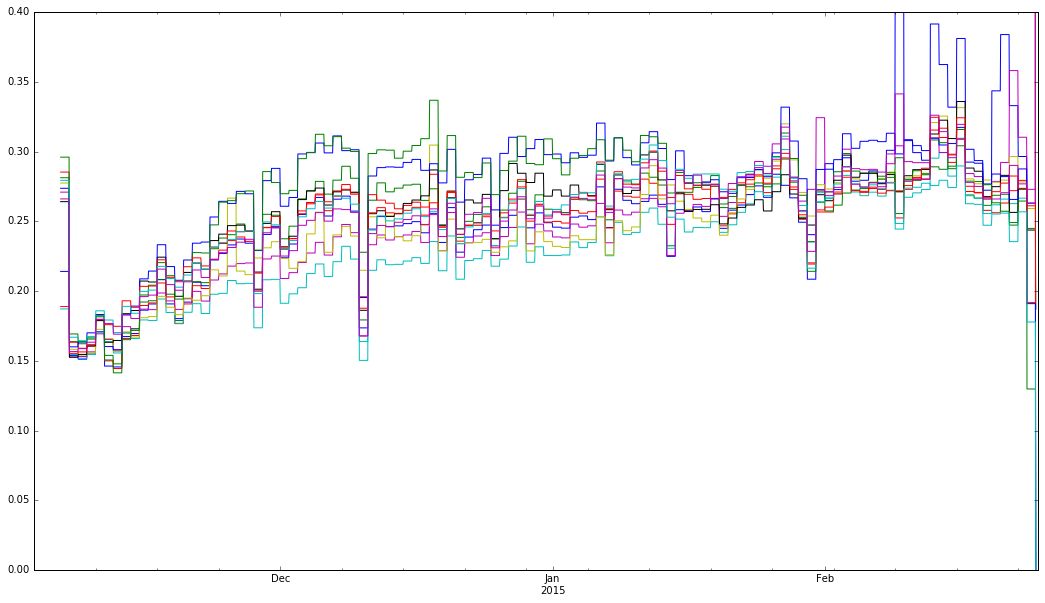

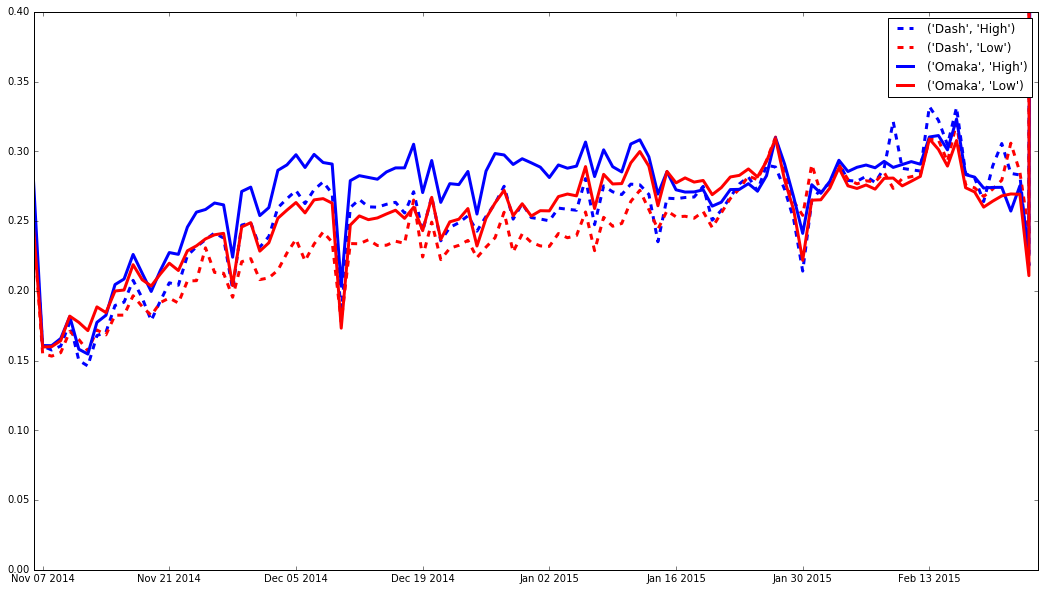

In [3]:
AlbedoHourly.plot(figsize=(18,10),legend=False,ylim=(0,.4))
AlbedoDaily = AlbedoHourly.resample('D').mean().groupby(level=('Cultivar','Irrigation'),axis=1).mean()
lines = ['--','--','-','-']
colors= ['b','r','b','r']
Graph = plt.figure(figsize=(18,10),)
pos=0
for treat in AlbedoDaily:
    plt.plot(AlbedoDaily.ix[:,treat].index,AlbedoDaily.ix[:,treat],lines[pos],color=colors[pos],linewidth=3,label=treat)
    pos+=1
plt.ylim(0,0.4)
plt.legend()

In [4]:
DetailSubSet = [('Dash','High','1'),('Dash','High','3'),('Dash','High','4'),
          ('Dash','Low','1'),('Dash','Low','3'),('Dash','Low','4'),
          ('Omaka','High','1'),('Omaka','High','3'),('Omaka','High','4'),
          ('Omaka','Low','1'),('Omaka','Low','2'),('Omaka','Low','4')]
DetailColumnIndex = pd.MultiIndex.from_tuples(DetailSubSet,
                                       names=['Cultivar','Irrigation','Block'])

In [5]:
RnDF = pd.DataFrame(index=TnRHourlyMeans.index,columns=DetailColumnIndex)
for plot in RnDF.columns:
    RnDF.ix[:,plot] = [et.NetRadiation(TnRHourlySums.ix[x,'IncomingRadnMJ'][0],
                              TnRHourlyMeans.ix[x,'AirTemperature'][0],
                              TnRHourlyMeans.ix[x,'VP'][0],
                              Lattitude,
                              TnRHourlyMeans.index[x].dayofyear,
                              TnRHourlyMeans.ix[x,'Duration'][0],
                              TnRHourlyMeans.ix[x,'Time'][0],
                              LongitudeTZ,
                              LongitudeML,
                              AlbedoHourly.ix[x,plot]) for x in range(RnDF.index.size)]  

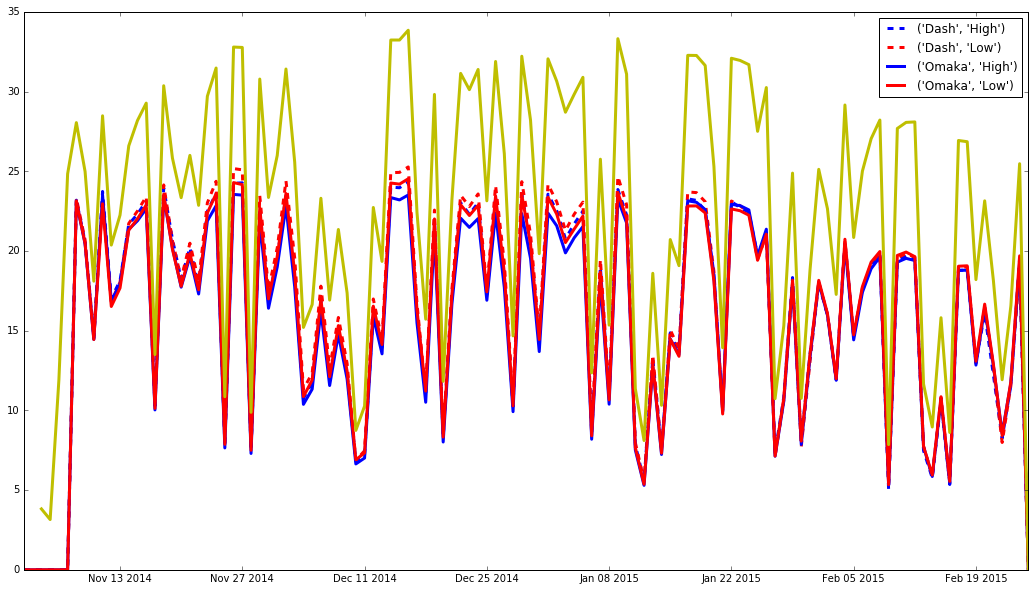

In [6]:
RnDaily = RnDF.resample('D').sum().groupby(level=('Cultivar','Irrigation'),axis=1).mean()
lines = ['--','--','-','-']
colors= ['b','r','b','r']
Graph = plt.figure(figsize=(18,10),)
pos=0
for treat in RnDaily:
    plt.plot(RnDaily.ix[:,treat].index,RnDaily.ix[:,treat],lines[pos],color=colors[pos],linewidth=3,label=treat)
    pos+=1
plt.plot(TnRHourlySums.ix[:,'IncomingRadnMJ'].resample('D').sum(),color='y',linewidth=3)
plt.legend()

## Convert radiation to W/m2

In [7]:
RnDF.index.name='Date'
RnDFLong = RnDF.unstack()
RnDFLong.name='Rn'
RnDFLong.to_pickle('.\DataFrames\NetRadiationMJ.pkl')
RnDFLong = RnDFLong * 1000000 / (60 * 60)

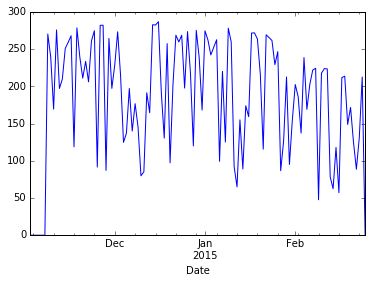

In [8]:
RnDFLong.ix[('Dash','High','1')].resample('D').mean().plot()

In [9]:
RnDFLong.name = 'Rn'

In [10]:
RnDFLong.to_pickle('.\DataFrames\NetRadiation.pkl')

## Set up data frame for net Radiation estimated for all plots

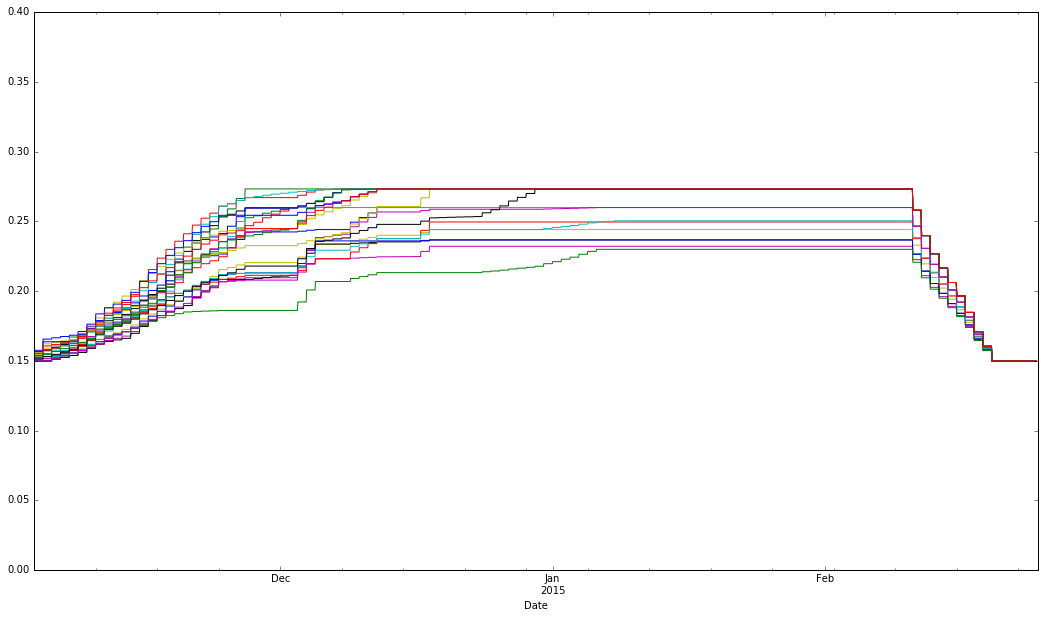

In [11]:
EstAlbedoHourly.plot(figsize=(18,10),legend=False,ylim=(0,.4))

In [12]:
FullColumnIndex = pd.MultiIndex.from_product([['Dash','Omaka'],
                                       ['High','Low','Mid'],
                                       ['1','2','3','4']],
                                       names=['Cultivar','Irrigation','Block'])

In [13]:
EstRnDF = pd.DataFrame(index=TnRHourlyMeans.index,columns=FullColumnIndex)
for plot in EstRnDF.columns:
    EstRnDF.ix[:,plot] = [et.NetRadiation(TnRHourlySums.ix[x,'IncomingRadnMJ'][0],
                              TnRHourlyMeans.ix[x,'AirTemperature'][0],
                              TnRHourlyMeans.ix[x,'VP'][0],
                              Lattitude,
                              TnRHourlyMeans.index[x].dayofyear,
                              TnRHourlyMeans.ix[x,'Duration'][0],
                              TnRHourlyMeans.ix[x,'Time'][0],
                              LongitudeTZ,
                              LongitudeML,
                              EstAlbedoHourly.ix[x,plot]) for x in range(RnDF.index.size)]  

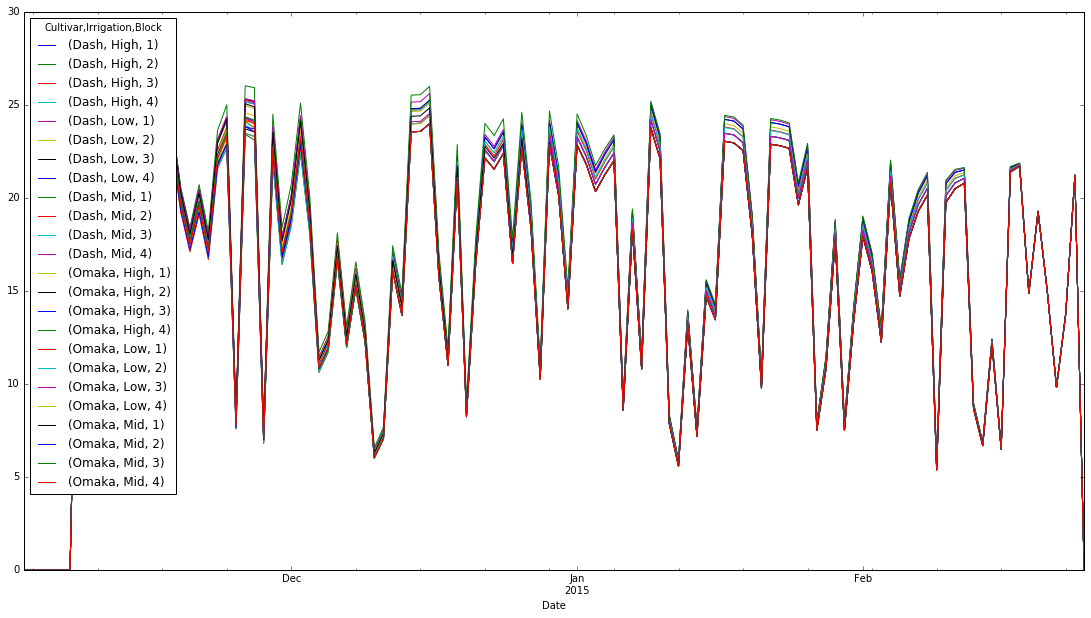

In [14]:
EstRnDF.resample('D').sum().plot(figsize=(19,10))

## Make Long

In [15]:
EstRnDF.index.name='Date'
EstRnDFDaily = EstRnDF.resample('D').sum()
EstRnDFLong = EstRnDFDaily.unstack()
EstRnDFLong = EstRnDFLong

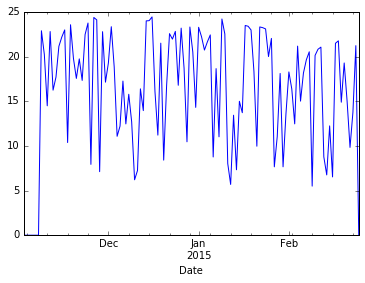

In [16]:
EstRnDFLong.ix[('Dash','High','1')].plot()

In [17]:
EstRnDFLong.to_pickle('.\DataFrames\EstNetRadiation.pkl')

In [18]:
RnDF2 = pd.DataFrame(index=TnRHourlyMeans.index,columns=DetailColumnIndex)
for plot in RnDF2.columns:
    RnDF2.ix[:,plot] = [et.NetRadiation(TnRHourlySums.ix[x,'IncomingRadnMJ'][0],
                              TnRHourlyMeans.ix[x,'IR_SurfaceTemp'].ix[plot[0:2]].ix[int(plot[2])-1],
                              TnRHourlyMeans.ix[x,'VP'][0],
                              Lattitude,
                              TnRHourlyMeans.index[x].dayofyear,
                              TnRHourlyMeans.ix[x,'Duration'][0],
                              TnRHourlyMeans.ix[x,'Time'][0],
                              LongitudeTZ,
                              LongitudeML,
                              AlbedoHourly.ix[x,plot]) for x in range(RnDF2.index.size)]  

In [19]:
x=1455
et.NetRadiation(TnRHourlySums.ix[x,'IncomingRadnMJ'][0],
                              20,
                              TnRHourlyMeans.ix[x,'VP'][0],
                              Lattitude,
                              TnRHourlyMeans.index[x].dayofyear,
                              TnRHourlyMeans.ix[x,'Duration'][0],
                              TnRHourlyMeans.ix[x,'Time'][0],
                              LongitudeTZ,
                              LongitudeML,
                              AlbedoHourly.ix[x,plot])

2.7239705296118601

In [20]:
TnRHourlyMeans.ix[x,'AirTemperature'][0]

25.825833333333335

In [21]:
x=1455
et.NetRadiation(TnRHourlySums.ix[x,'IncomingRadnMJ'][0],
                              TnRHourlyMeans.ix[x,'IR_SurfaceTemp'].ix[plot[0:2]].ix[int(plot[2])-1],
                              TnRHourlyMeans.ix[x,'VP'][0],
                              Lattitude,
                              TnRHourlyMeans.index[x].dayofyear,
                              TnRHourlyMeans.ix[x,'Duration'][0],
                              TnRHourlyMeans.ix[x,'Time'][0],
                              LongitudeTZ,
                              LongitudeML,
                              AlbedoHourly.ix[x,plot])

2.7200146129039795

In [22]:
x=1455
print(TnRHourlySums.ix[x,'IncomingRadnMJ'][0])
print(TnRHourlyMeans.ix[x,'IR_SurfaceTemp'].ix[plot[0:2]].ix[int(plot[2])-1])
print(TnRHourlyMeans.ix[x,'VP'][0])
print(Lattitude)
print(TnRHourlyMeans.index[x].dayofyear)
print(TnRHourlyMeans.ix[x,'Duration'][0])
print(TnRHourlyMeans.ix[x,'Time'][0])
print(LongitudeTZ)
print(LongitudeML)
print(AlbedoHourly.ix[x,plot])

3.6916026
30.7125
0.946587995207
-43.38
2
0.0833333333333
12.4583333333
185
187.72
0.255175523026


In [23]:
et.NetLongwaveRadiation(30,30,1,-43,2,12,12.45,185,187.72)

3.834681745558505

In [24]:
et.NetLongwaveRadiation(30,20,1,-43,2,12,12.45,185,187.72)

3.353208702345868

In [25]:
TnRHourlyMeans.ix[x,'IR_SurfaceTemp'].ix[plot[0:2]].ix[int(plot[2])-1]

30.712500000000002

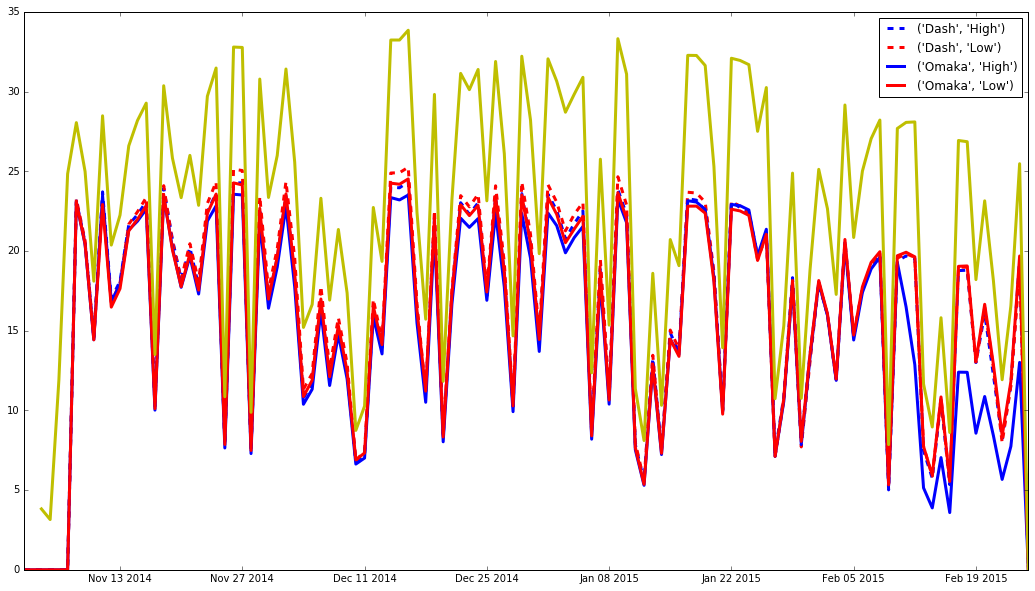

In [26]:
Rn2Daily = RnDF2.resample('D').sum().groupby(level=('Cultivar','Irrigation'),axis=1).mean()
lines = ['--','--','-','-']
colors= ['b','r','b','r']
Graph = plt.figure(figsize=(18,10),)
pos=0
for treat in Rn2Daily:
    plt.plot(Rn2Daily.ix[:,treat].index,Rn2Daily.ix[:,treat],lines[pos],color=colors[pos],linewidth=3,label=treat)
    pos+=1
plt.plot(TnRHourlySums.ix[:,'IncomingRadnMJ'].resample('D').sum(),color='y',linewidth=3)
plt.legend()

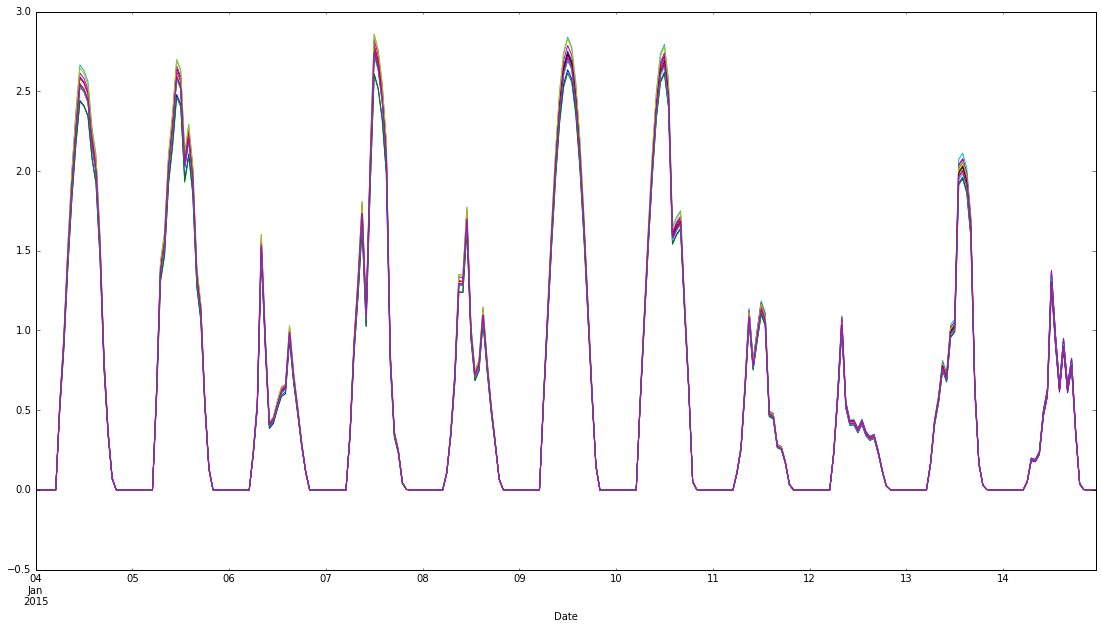

In [27]:
RnDF2.ix['2015-01-04':'2015-01-14',:].plot(legend=False,figsize=(19,10))

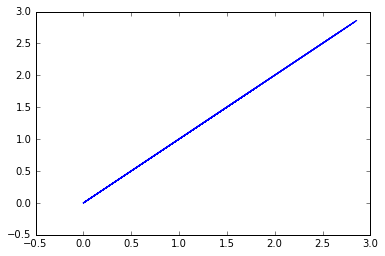

In [28]:
plt.plot(RnDF2.ix['2015-01-04':'2015-01-14',('Dash','Low','1')],RnDF.ix['2015-01-04':'2015-01-14',('Dash','Low','1')])

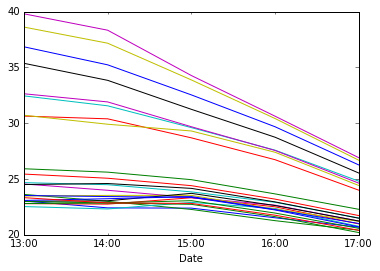

In [29]:
TnRHourlyMeans.ix[1455:1460,'IR_SurfaceTemp'].plot(legend=False)

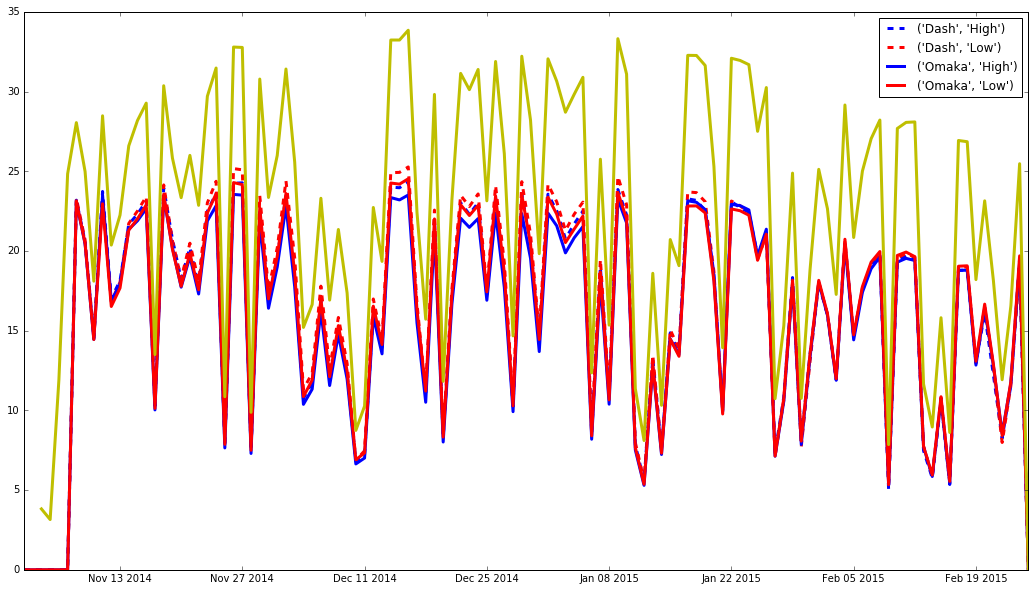

In [30]:
RnDaily = RnDF.resample('D').sum().groupby(level=('Cultivar','Irrigation'),axis=1).mean()
lines = ['--','--','-','-']
colors= ['b','r','b','r']
Graph = plt.figure(figsize=(18,10),)
pos=0
for treat in RnDaily:
    plt.plot(RnDaily.ix[:,treat].index,RnDaily.ix[:,treat],lines[pos],color=colors[pos],linewidth=3,label=treat)
    pos+=1
plt.plot(TnRHourlySums.ix[:,'IncomingRadnMJ'].resample('D').sum(),color='y',linewidth=3)
plt.legend()